#**ANALISIS TRANSAKSI PENJUALAN KAFE PADA TAHUN 2023**

---

Nama: Rivalio Chendra  
NIM : 2509116039  
Kelas : A

# **IMPORT LIBRARY**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**BUSINESS UNDERSTANDING**

## **Business Objective**

Dataset ini berisi 10.000 transaksi penjualan sebuah kafe pada tahun 2023. Di dalam dataset ini terdapat 8 kolom yaitu Transaction ID, Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, dan Transaction Date. Dataset ini penuh dengan masalah pada datanya, ada nilai kosong, nilai "ERROR", "UNKNOWN", dan data yang tidak konsisten.


Tujuan analisis bisnis kafe ini adalah untuk memahami pola penjualan kafe sepanjang 2023, produk apa yang paling laris, kapan puncak penjualan terjadi, di mana transaksi paling banyak, dan metode pembayaran apa yang paling sering digunakan. Setelah mengetahui pola maka di harapkan dapat meningkatkan performa penjualan kafe, pendapatan dan efisiensi operasional.

##**Assess Situation**

Terdapat masalah kualitas data yang ditemukan di dataset ini:

-  Beberapa kolom memiliki data yang tidak terisi sama sekali. Seperti di kolom "Location" , dan "Payment Method" kehilangan banyak data. Jika dibiarkan, analisis berbasis dua kolom ini tidak akan akurat
- Ditemukan kata "ERROR" di banyak kolom seperti "Item", "Quantity", "Price Per Unit", "Total Spent", "Payment Method", "Location", dan "Transaction Date". Jika tidak diperbaiki maka akan menghambat proses analisis.
- Selain ERROR, ada juga nilai "UNKNOWN" yang tersebar di kolom-kolom serupa.


Jika data kotor ini langsung digunakan untuk analisis, laporan keuangan bisa keliru, visualisasi akan berantakan, dan keputusan bisnis yang diambil berdasarkan data ini bisa salah arah.

## **Analytic Goals**

Tujuan analitik yang ingin dicapai dari dataset ini adalah:
- Mengidentifikasi produk dengan penjualan tertinggi dan produk yang menghasilkan pendapatan (Total Spent) terbesar.
- Mengetahui metode pembayaran (Cash, Credit Card, Digital Wallet) mana yang paling sering digunakan oleh pelanggan. Ini membantu kafe memutuskan apakah perlu menambah terminal pembayaran tertentu.
- Membandingkan jumlah transaksi In-store vs Takeaway untuk memahami kebiasaan pelanggan dalam mengonsumsi produk kafe.
- Menghitung total pendapatan dan rata-rata pengeluaran per transaksi untuk megetahui kondisi finansial kafe.
- Mengetahui apakah ada korelasi antara Quantity dengan Total Spent.

##**Project Plans**

Rencana pengerjaan dataset ini adalah:
- Membersihkan seluruh data kotor, menangani nilai ERROR dan UNKNOWN, mengisi atau menghapus missing values, memperbaiki tipe data, dan memastikan data siap untuk dianalisis.
- Setelah data bersih, maka mulai menganalisis dan mengolah data untuk menyelesaikan tujuan di analytic goal.
- Memvisualisasikan produk terlaris, penjualan bulanan, perbandingan metode pembayaran, dan lokasi transaksi.
- Membuat insight yang berguna bagi manajemen kafe untuk pengambilan keputusan.
-  Kemudian menarik kesimpulan berdasarkan hasil analisis.


# **DATA UNDERSTANDING**

## **Memuat Dataset**

Dataset ini berisi transaksi penjualan sebuah kafe selama tahun 2023. Data bersumber dari sistem kasir kafe yang mencatat setiap transaksi, namun mengalami masalah kualitas data sehingga data perlu di bersihkan sebelum dapat digunakan.

In [3]:
file = '/content/drive/MyDrive/DATASET AVD/dirty_cafe_sales.csv'
df = pd.read_csv(file)

df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


Dari tampilan awal dataset, langsung terlihat adanya nilai "ERROR" di kolom "Total Spent", Missing values di "Price Per Unit", "Payment Method", serta "Location Data", dan nilai "UNKNOWN" di kolom 'Payment Method" serta "Location".

## **Deskripsi Data**

### **Informasi Dasar**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


Berdasarkan output di atas, dapat diketahui bahwa dataset ini memiliki 10.000 baris dan 8 kolom.

Semua kolom saat ini bertipe data object, padahal kolom seperti "Quantity", "Price Per Unit", dan "Total Spent" seharusnya bertipe numerik.

### **Informasi Lanjutan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


1. Transaction ID: jumlah baris: 10.00 (lengkap), tipe data: object, deskripsi: Kode unik pengenal setiap transaksi, berfungsi sebagai primary key setiap baris data dan tidak memiliki missing values sama sekali.

2. Item: jumlah baris : 9.667 (ada 333 yang kosong), tipe data: object, deskripsi: Nama produk yang dibeli pelanggan.

3. Quantity: jumlah baris: 9.862 (ada 138 yang kosong), tipe data: object, deskripsi: Jumlah item yang dibeli dalam satu transaksi.

4. Price Per Unit: jumlah baris: 9.821 (ada 179 yang kosong), tipe data: object, deskripsi: Harga satuan produk dalam mata uang tertentu.

5. Total Spent: jumlah baris: 9.827 (ada 173 yang kosong), tipe data: object, deskripsi: Total uang yang dikeluarkan pelanggan dalam satu transaksi (Quantity x Price Per Unit).

6. Payment Method: jumlah baris: 7.421 (ada 2.579 yang kosong), tipe data: object, deskripsi: Metode pembayaran yang digunakan pelanggan.

7. Location: jumlah baris: 6.735 (ada 3.265 yang kosong), tipe data: object, deskripsi: Lokasi transaksi, yaitu In-store (makan di tempat) atau Takeaway (dibawa pulang).

8. Transaction Date: jumlah baris: 9.841 (ada 159 yang kosong), tipe data: object, deskripsi    : Tanggal transaksi berlangsung dengan format YYYY-MM-DD.

### **Informasi Statistik Deskriptif**

In [ ]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


1. Count (Kelengkapan Data)

Berdasarkan data, total baris transaksi adalah 10.000. Maka dapat disimpulkan:
* Item hilang 333 data (10.000 - 9.667)
* Quantity hilang 138 data (10.000 - 9.862)
* Price Per Unit hilang 179 data (10.000 -9.821)  
* Total Spent hilang 173 data (10.000 - 9.827)
* Payment Method hilang 2.579 data (10.000 - 7.421)
* Location hilang 3.265 data (10.000 - 6.735)
* Transaction Date hilang 159 data (10.000 - 9.841)

Kesimpulan: Kolom Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location dan Transaction Date mengandung missing values ERROR, dan UNKNOWN , sementara kolom lainnya sudah lengkap (10.000 data)

## **VERIFIKASI KUALITAS DATA**

### **Data Type Check**

Mengecek apakah tipe data setiap kolom sudah sesuai dengan isi datanya. Tipe data yang salah dapat menyebabkan error atau hasil analisis yang keliru.

In [4]:
df['Quantity'] = df['Quantity'].replace(['ERROR', 'UNKNOWN'], pd.NA)
df['Quantity'] = pd.to_numeric(df['Quantity'])
df['Quantity'] = df['Quantity'].astype(pd.Int64Dtype())

print("Tipe data kolom 'Quantity' setelah diubah:")
print(df['Quantity'].dtype)

Tipe data kolom 'Quantity' setelah diubah:
Int64


In [5]:
df['Price Per Unit'] = df['Price Per Unit'].replace(['ERROR', 'UNKNOWN'], pd.NA)
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'])

print("Tipe data kolom 'Price Per Unit' setelah diubah:")
print(df['Price Per Unit'].dtype)

Tipe data kolom 'Price Per Unit' setelah diubah:
float64


In [6]:
df['Total Spent'] = df['Total Spent'].replace(['ERROR', 'UNKNOWN'], pd.NA)
df['Total Spent'] = pd.to_numeric(df['Total Spent'])

print("Tipe data kolom 'Total Spent' setelah diubah:")
print(df['Total Spent'].dtype)

Tipe data kolom 'Total Spent' setelah diubah:
float64


In [ ]:
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,Int64
Price Per Unit,float64
Total Spent,float64
Payment Method,object
Location,object
Transaction Date,object


Seluruh kolom bertipe object, namun harusnya ada kolom-kolom yang bukan bertipe object, anatara lain:
- Quantity: seharusnya int64, karena jumlah barang tidak mungkin desimal.
- Price Per Unit: Seharusnya float, karena ini adalah nilai harga.
- Total Spent: Seharusnya float, karena ini adalah total harga.
- Transaction Date: Seharusnya Datetime, karena isinya adalah tanggal.

*Catatan: Awalnya seluruh kolom bertipe object, namun tipe datanya di ubah lebih awal untuk keperluan analisis.*

### **Incosistent Values**

Nilai tidak konsisten adalah data yang seharusnya memiliki format atau pilihan tertentu, namun malah di isi dengan nilai yang tidak sesuai.

1. **Item**  

Seharusnya hanya berisi nama produk kafe yang valid. Namun ditemukan nilai "ERROR" dan "UNKNOWN" yang tidak mewakili produk apapun.

In [ ]:
print(df['Item'].unique())

['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']


2. **Quantity**

Seharusnya hanya berisi jumlah item yang dibeli. Namun ditemukan nilai "ERROR" dan "UNKNOWN" yang tidak mewakili jumlah apapun.

In [ ]:
print(df['Quantity'].unique())

['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]


3. **Price Per Unit**

Seharusnya hanya berisi harga yang dibeli. Namun ditemukan nilai "ERROR" dan "UNKNOWN".

In [ ]:
print(df['Price Per Unit'].unique())

['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']


4. **Total Spent**

Seharusnya hanya berisi total uang yang dibayar pelanggan. Namun ditemukan nilai "ERROR" dan "UNKNOWN".

In [ ]:
print(df['Total Spent'].unique())

['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']


5. **Payment Method**

Seharusnya hanya berisi 3 metode pembayaran valid: Cash, Credit Card, Digital Wallet. Namun ditemukan nilai "ERROR" dan "UNKNOWN".

In [ ]:
print(df['Payment Method'].unique())

['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]


6. **Location**

Seharusnya hanya berisi 2 nilai valid: In-store dan Takeaway. Namun ditemukan nilai "ERROR" dan "UNKNOWN".

In [ ]:
print(df['Location'].unique())

['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']


7. **Transaction Date**

Seharusnya hanya berisi tanggal pembelian. Namun ditemukan nilai "ERROR" dan "UNKNOWN".

In [ ]:
print(df['Transaction Date'].unique())

['2023-09-08' '2023-05-16' '2023-07-19' '2023-04-27' '2023-06-11'
 '2023-03-31' '2023-10-06' '2023-10-28' '2023-07-28' '2023-12-31'
 '2023-11-07' 'ERROR' '2023-05-03' '2023-06-01' '2023-03-21' '2023-11-15'
 '2023-06-10' '2023-02-24' '2023-03-25' '2023-01-15' '2023-04-04'
 '2023-03-30' '2023-12-01' '2023-09-18' '2023-06-03' '2023-12-13'
 '2023-04-20' '2023-04-10' '2023-03-11' '2023-06-02' '2023-11-06'
 '2023-08-15' '2023-10-09' '2023-05-28' '2023-07-17' '2023-04-29'
 '2023-06-08' '2023-06-29' '2023-04-17' '2023-12-22' '2023-01-10'
 '2023-10-02' '2023-02-23' '2023-03-22' '2023-11-03' '2023-03-02'
 '2023-06-26' '2023-05-02' '2023-09-05' '2023-01-08' '2023-03-15'
 '2023-11-25' '2023-12-05' '2023-03-19' '2023-06-27' '2023-04-19'
 '2023-10-07' '2023-09-30' '2023-05-27' '2023-11-18' '2023-10-20'
 '2023-10-03' '2023-10-27' '2023-04-06' '2023-01-31' '2023-12-08'
 '2023-06-19' '2023-12-14' '2023-07-16' '2023-02-22' nan '2023-06-15'
 '2023-12-09' '2023-04-18' '2023-10-29' '2023-04-30' '2023-04-02

"ERROR" dan "UNKNOWN" hampir muncul di semua kolom.

### **Missing Values**

Missing values adalah baris yang benar-benar kosong (tidak ada isinya sama sekali). Perlu dibedakan dengan nilai ERROR/UNKNOWN yang memang diisi teks tertentu.

Pada tahap ini, kita akan melihat seberapa banyak data yang hilang pada seluruh kolom. Dan terlihat bahwa kolom:

- item: Memiliki missing values sekitar 3%.
- Quantity: Memiliki missing values sekitar 1%.
- Price Per Unit: Memiliki missing values sekitar 2%.
- Total Spent: Memiliki missing values sekitar 2%.
- Payment Method: Memiliki missing values sekitar 25%.
- Location: Memiliki missing values sekitar 32%.
- Transaction Date: Memiliki missing values sekitar 1%.

Dapat dilihat hampir semua kolom memiliki missing values, sehingga setiap missing values perlu ditangani atau dihapus untuk kelancaran analisis.

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Transaction ID,0.00
Item,3.33
Quantity,1.38
Price Per Unit,1.79
Total Spent,1.73
Payment Method,25.79
Location,32.65
Transaction Date,1.59


### **Duplicated Values**

Data duplikat adalah baris yang isinya sama persis dengan baris lain. Pada tahap ini, kita akan mengecek duplikasi pada dataset. Hal ini dilakukan agar dataset memiliki insight dan hasil yang bersih.

In [ ]:
df[df.duplicated()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


Datataset ini tidak memiliki baris duplikat sama sekali. Jadi hal ini tidak perlu ditangani.

### **Outlier Values**

Outlier adalah nilai yang sangat jauh menyimpang dari nilai data lainnya. Dapat di periksa menggunakan boxplot pada kolom-kolom numerik yang sudah dibersihkan dari ERROR/UNKNOWN.

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Quantity,0.00
Price Per Unit,0.00
Total Spent,2.59


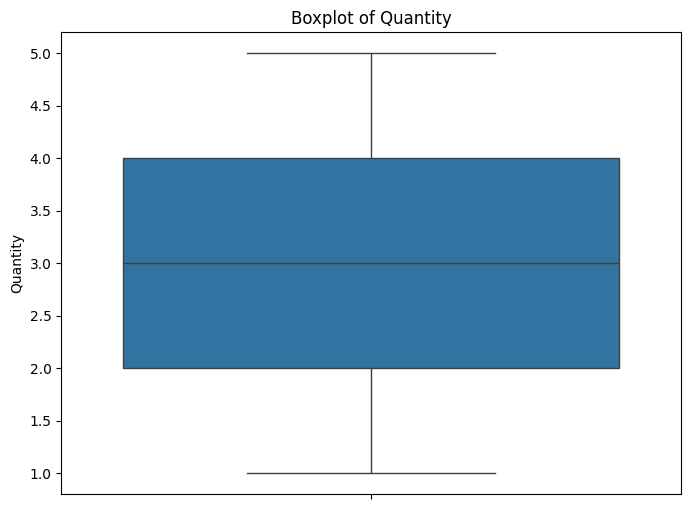

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.ylabel('Quantity')
plt.show()

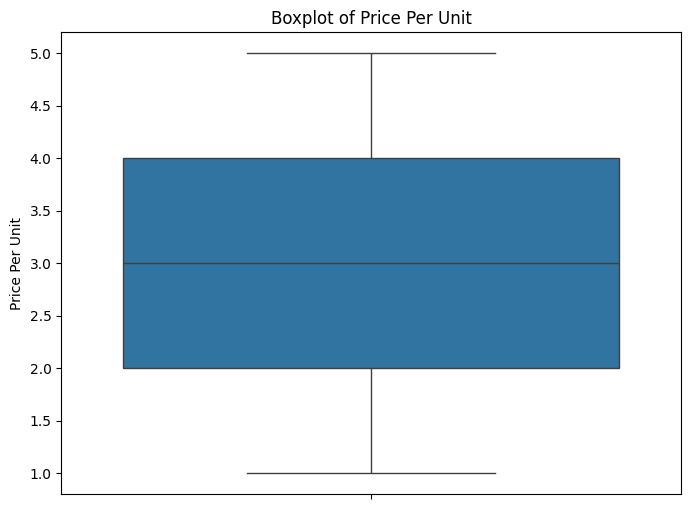

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Price Per Unit'])
plt.title('Boxplot of Price Per Unit')
plt.ylabel('Price Per Unit')
plt.show()

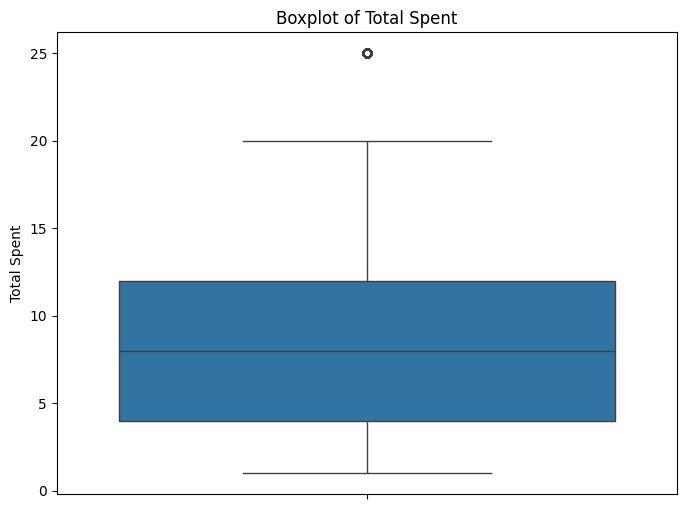

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Total Spent'])
plt.title('Boxplot of Total Spent')
plt.ylabel('Total Spent')
plt.show()

Dapat dilihat ketiga kolom ini memiliki outlier yang masih tergolong normal, dengan:
- Quantity: Presentase 0%.
- Price Per Unit: Presentase 0%.
- Total Spent : Presentase sekitar 3%

Walaupun Total spent memiliki presentase outlier, namun presentasenya masih dalam batas normal.

# **EKSPLORASI DATA (EDA)**

## **Comparison/Perbandingan**


Aktivitas: Membandingkan total pendapatan (Total Spent) yang dihasilkan oleh setiap jenis produk yang dijual kafe.

Tujuan: Mengidentifikasi produk mana yang memberikan kontribusi pendapatan terbesar dan membandingkan performa antar produk secara langsung.

Visualisasi: Bar Chart (Grafik Batang).

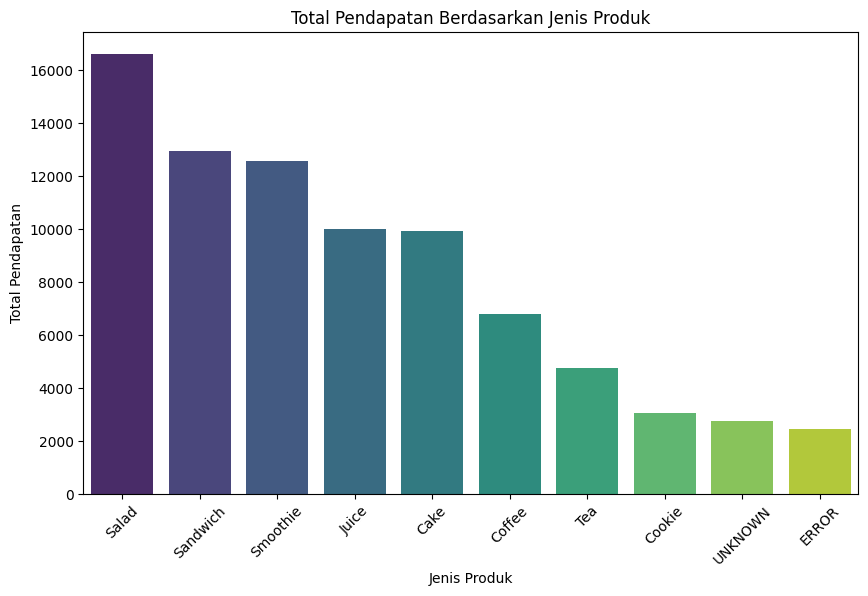

In [47]:
penjualan_item = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=penjualan_item.index, y=penjualan_item.values, palette='viridis', hue=penjualan_item.index, legend=False)
plt.title('Total Pendapatan Berdasarkan Jenis Produk')
plt.xlabel('Jenis Produk')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45)
plt.show()

Dari grafik batang di atas terlihat bahwa Salad adalah produk dengan total pendapatan tertinggi, jauh melampaui produk lainnya, di ikuti oleh Sandwich dan smoothie. Ini dapat menjadi sinyal bagi manajemen kafe bahwa produk seperti Salad, Sandwich, dan Smoothie harus dijaga kualitas dan ketersediaannya  karena kontribusinya terhadap total omzet jauh lebih besar dibanding produk murah.

Di dalam grafik batang dapat terlihat ada dua produk bernama "UNKNOWN" dan ERROR, dua produk ini tidak perlu di pedulikan karena merupakan data yang belum bersih.

## **Composition/Komposisi**

Aktivitas: Melihat proporsi atau persentase penggunaan setiap metode pembayaran oleh pelanggan kafe.

Tujuan: Mengetahui metode pembayaran mana yang paling dominan digunakan pelanggan.

Visualisasi: Pie Chart (Grafik Lingkaran).

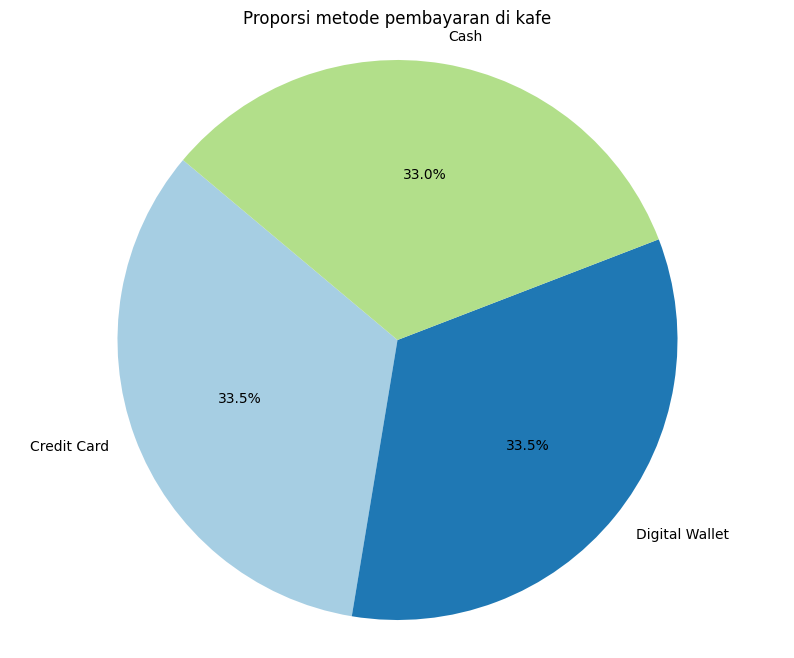

In [10]:
payment_method = df.groupby('Payment Method')['Total Spent'].sum().sort_values(ascending=False)
payment_count = payment_method.head(3)

plt.figure(figsize=(10, 8))
payment_count.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporsi metode pembayaran di kafe')
plt.ylabel('')
plt.axis('equal')
plt.show()

Pie chart di atas menunjukkan bahwa ketiga metode pembayaran, Digital Wallet (33,6%), Credit Card (33,3%), dan Cash (33,1%) memiliki presentase yang hampir sama persis. Tidak ada satu metode yang mendominasi secara signifikan.  Oleh karena itu kafe wajib memastikan ketiga metode pembayaran selalu tersedia dan berfungsi dengan baik, jika salah satu tidak bisa digunakan, kafe berpotensi kehilangan hampir sepertiga dari seluruh pelanggannya.

## **Distribution/Distribusi**

Aktivitas: Menganalisis penyebaran nilai pengeluaran pada kolom Total Spent.

Tujuan: Melihat apakah mayoritas transaksi bernilai kecil atau besar, serta mendeteksi adanya kecondongan (skewness) dalam data pengeluaran pelanggan kafe.

Visualisasi: Histogram.

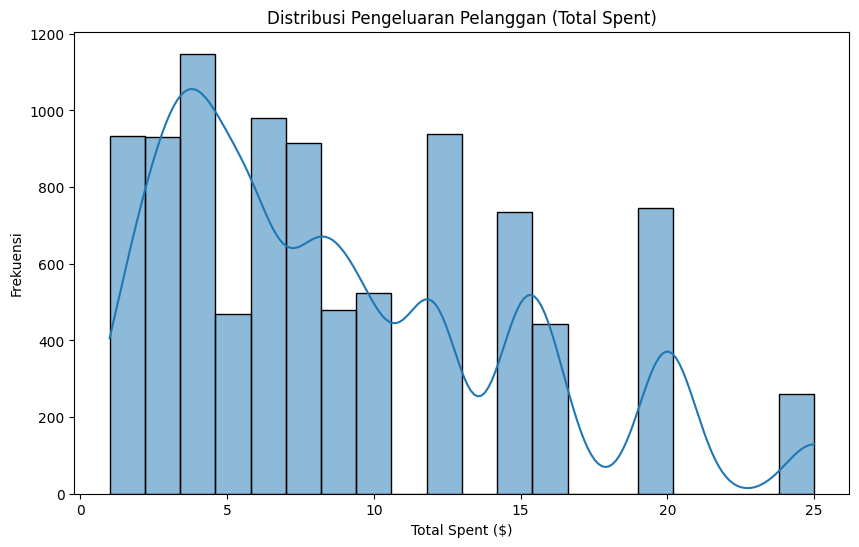

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Spent'], bins=20, kde=True)
plt.title('Distribusi Pengeluaran Pelanggan (Total Spent)')
plt.xlabel('Total Spent ($)')
plt.ylabel('Frekuensi')
plt.show()

Sebagian besar transaksi pelanggan berada pada nilai pengeluaran rendah hingga menengah (sekitar 2–10), yang menunjukkan bahwa mayoritas pelanggan melakukan pembelian dalam jumlah kecil atau secukupnya. Distribusi terlihat miring ke kanan (right-skewed), karena hanya sedikit transaksi dengan nilai tinggi (sekitar 15–25). Hal ini berarti transaksi besar memang ada, tetapi jumlahnya jauh lebih sedikit dibanding transaksi biasa,

## **Relationship/Hubungan**

Aktivitas: Menganalisis korelasi antara jumlah item yang dibeli (Quantity) dengan total pengeluaran pelanggan (Total Spent).

Tujuan: Mengetahui apakah peningkatan jumlah item yang dibeli selalu berbanding lurus dengan peningkatan total pengeluaran, serta mengidentifikasi seberapa kuat hubungan antara kedua variabel tersebut.

Visualisasi: Heatmap.

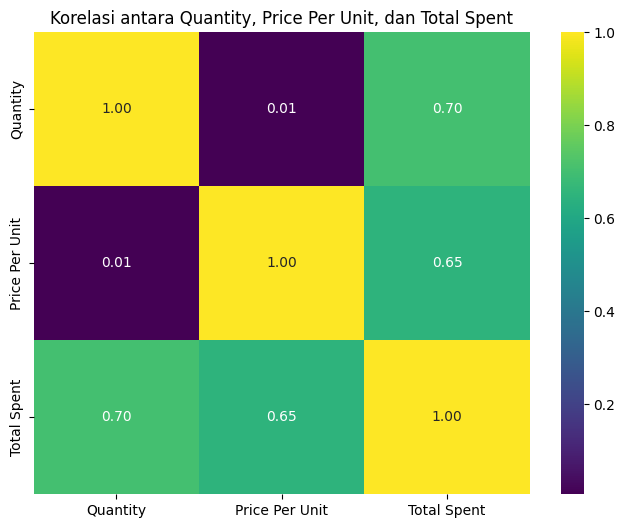

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['Quantity', 'Price Per Unit', 'Total Spent']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Korelasi antara Quantity, Price Per Unit, dan Total Spent')
plt.show()

Dari heatmap ini, dapat disimpulkan:
- Quantity - Total Spent (0.70):  Korelasinya cukup positif, artinya semakin banyak item yang dibeli pelanggan, semakin besar pula total pengeluarannya.
- Price Per Unit - Total Spent (0.65):  Korelasinya cukup positif, artinya produk dengan harga lebih tinggi berkontribusi lebih besar terhadap total pengeluaran.
- Quantity - Price Per Unit (0.01): Korelasinya sangat lemah bahkan hampir nol, Artinya harga produk tidak mempengaruhi berapa banyak item yang dibeli pelanggan. Pelanggan membeli produk mahal dan murah dalam jumlah yang sama.